In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_colesterol = pd.read_csv('./datasets/colesterol.csv')

In [4]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,997.000000,997.000000,997.000000,1000.000000
mean,500.500000,49.206620,76.496690,174.889669,199.453260
std,288.819436,17.476704,21.439132,8.844703,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.700000,167.000000,166.345000
50%,500.500000,49.000000,75.500000,175.000000,199.455000
75%,750.250000,65.000000,90.200000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [6]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [7]:
df_colesterol['Grupo Sanguíneo'].value_counts()

Grupo Sanguíneo
O     323
AB    268
A     266
B     139
Name: count, dtype: int64

In [8]:
df_colesterol['Fumante'].value_counts()

Fumante
Não    631
Sim    366
Name: count, dtype: int64

In [9]:
df_colesterol['Nível de Atividade'].value_counts()

Nível de Atividade
Baixo       426
Moderado    298
Alto        272
Name: count, dtype: int64

In [10]:
df_colesterol.drop(['Id'], axis=1, inplace=True)

In [11]:
df_colesterol.shape

(1000, 7)

In [12]:
df_colesterol.columns

Index(['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade', 'Idade', 'Peso',
       'Altura', 'Colesterol'],
      dtype='object')

In [13]:
df_colesterol.columns = [
  'grupo_sanguineo',
  'fumante',
  'nivel_de_atividade_fisica',
  'idade',
  'peso',
  'altura',
  'colesterol'
]

In [14]:
df_colesterol.columns

Index(['grupo_sanguineo', 'fumante', 'nivel_de_atividade_fisica', 'idade',
       'peso', 'altura', 'colesterol'],
      dtype='object')

In [15]:
df_colesterol_eda = df_colesterol.copy()
df_colesterol_bucketing = df_colesterol.copy()

In [16]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [17]:
df_colesterol_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [18]:
df_colesterol_eda.nivel_de_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [19]:
df_colesterol_eda.isna().sum()

grupo_sanguineo              4
fumante                      3
nivel_de_atividade_fisica    4
idade                        3
peso                         3
altura                       3
colesterol                   0
dtype: int64

In [20]:
# Medidas estatísticas
df_colesterol_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [21]:
# Coletar medidas das variáveis categóricas
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_de_atividade_fisica = df_colesterol_eda.nivel_de_atividade_fisica.mode()

In [22]:
# Coletar medidas das variáveis numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [23]:
# Imputar valores ausentes
df_colesterol_eda.fillna(value={
  'grupo_sanguineo': moda_grupo_sanguineo[0],
  'fumante': moda_fumante[0],
  'nivel_de_atividade_fisica': moda_nivel_de_atividade_fisica[0],
  'idade': mediana_idade,
  'peso': mediana_peso,
  'altura': mediana_altura
}, inplace=True)

In [24]:
# Converter idade e altura para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)

In [25]:
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [26]:
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grupo_sanguineo            1000 non-null   object 
 1   fumante                    1000 non-null   object 
 2   nivel_de_atividade_fisica  1000 non-null   object 
 3   idade                      1000 non-null   int32  
 4   peso                       1000 non-null   float64
 5   altura                     1000 non-null   int32  
 6   colesterol                 1000 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 47.0+ KB


<Axes: xlabel='idade'>

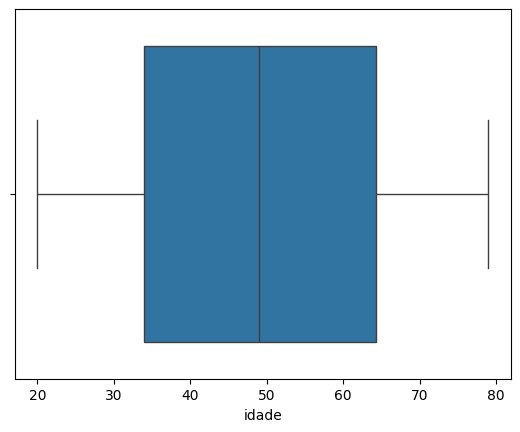

In [27]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

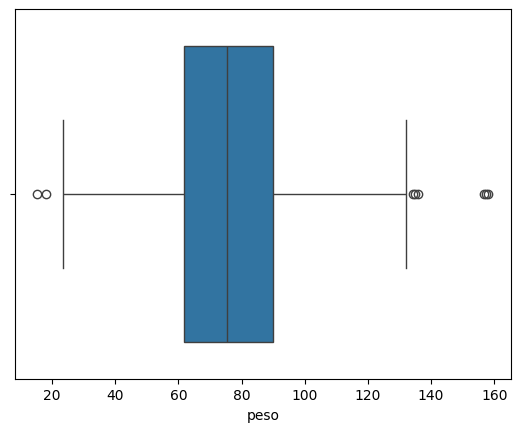

In [28]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [29]:
df_colesterol_eda[df_colesterol_eda.peso < 40].count()

grupo_sanguineo              37
fumante                      37
nivel_de_atividade_fisica    37
idade                        37
peso                         37
altura                       37
colesterol                   37
dtype: int64

In [30]:
# Remover publico do DataFrame
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.peso < 40].index, inplace=True)

<Axes: xlabel='altura'>

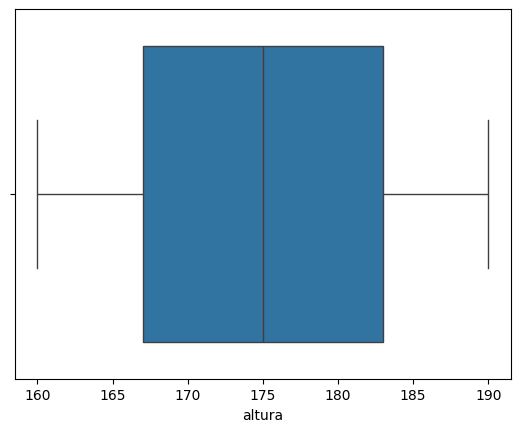

In [31]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='colesterol'>

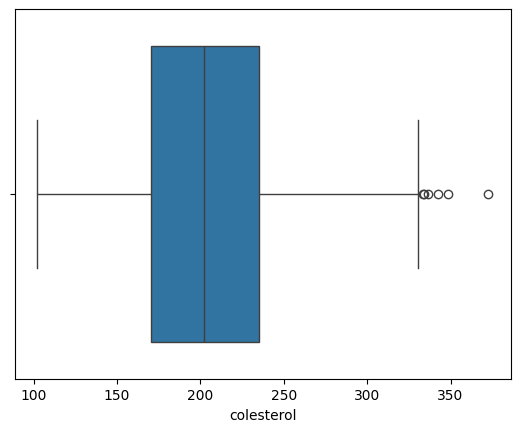

In [32]:
sns.boxplot(data=df_colesterol_eda, x='colesterol')

<Axes: xlabel='grupo_sanguineo', ylabel='colesterol'>

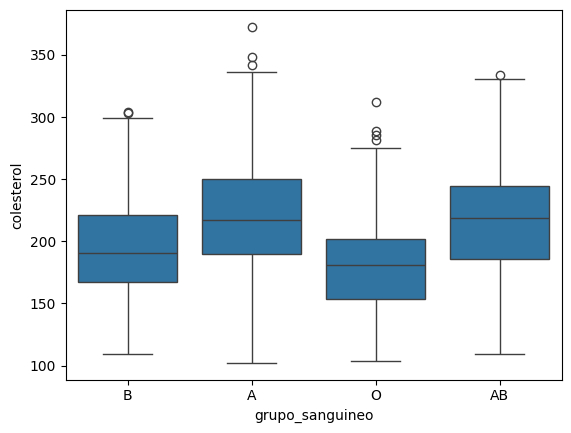

In [33]:
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='colesterol')

<Axes: xlabel='fumante', ylabel='colesterol'>

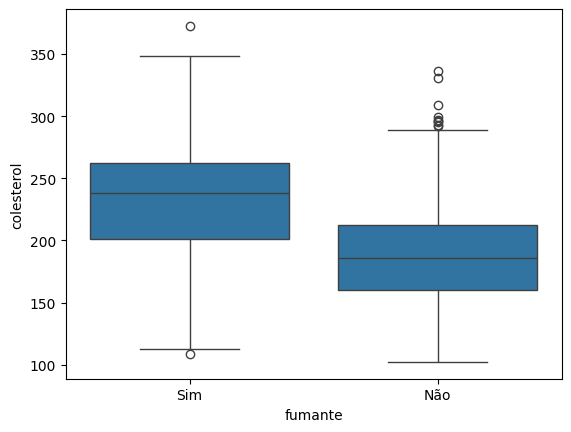

In [34]:
sns.boxplot(data=df_colesterol_eda, x='fumante', y='colesterol')

<Axes: xlabel='nivel_de_atividade_fisica', ylabel='colesterol'>

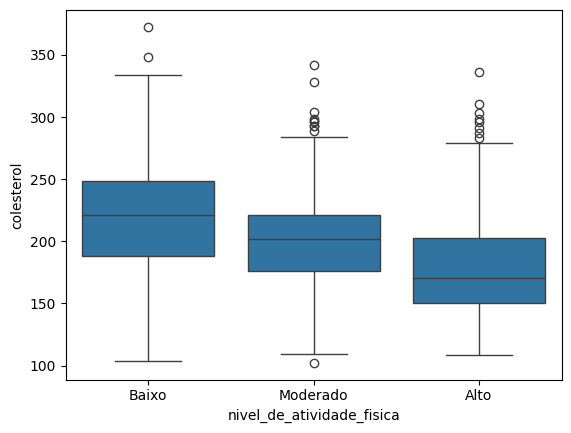

In [35]:
sns.boxplot(data=df_colesterol_eda, x='nivel_de_atividade_fisica', y='colesterol')

<Axes: xlabel='idade', ylabel='colesterol'>

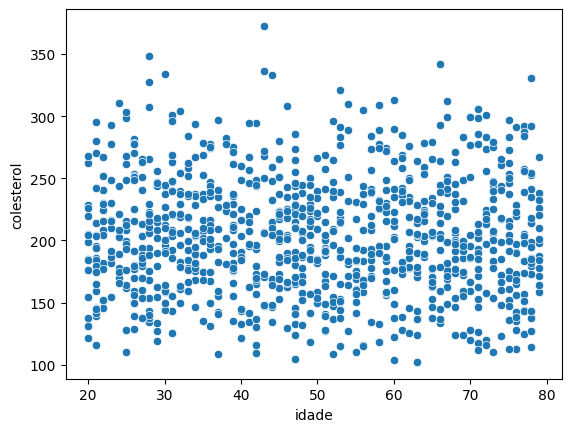

In [36]:
# Cruzamento variáveis numéricas com nível de colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='colesterol')

<Axes: xlabel='peso', ylabel='colesterol'>

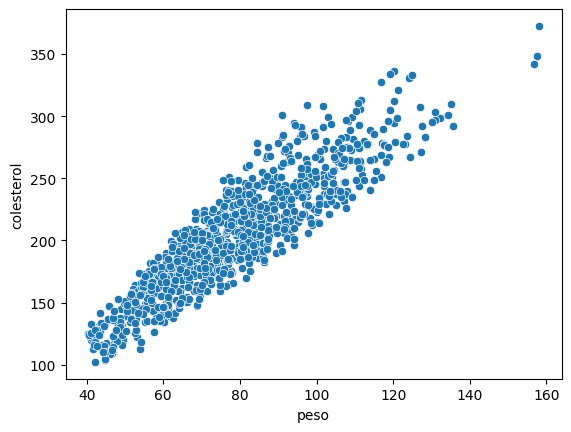

In [37]:
sns.scatterplot(data=df_colesterol_eda, x='peso', y='colesterol')

<Axes: xlabel='altura', ylabel='colesterol'>

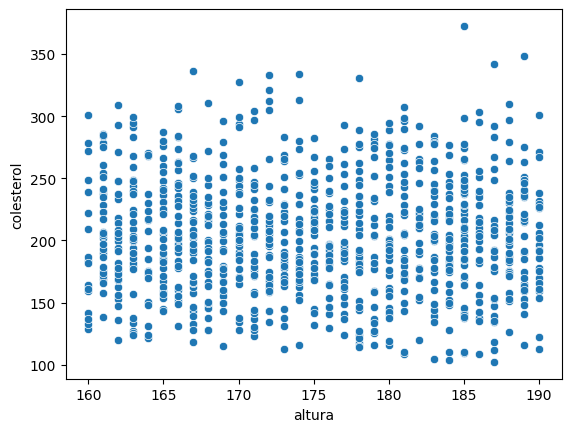

In [38]:
sns.scatterplot(data=df_colesterol_eda, x='altura', y='colesterol')

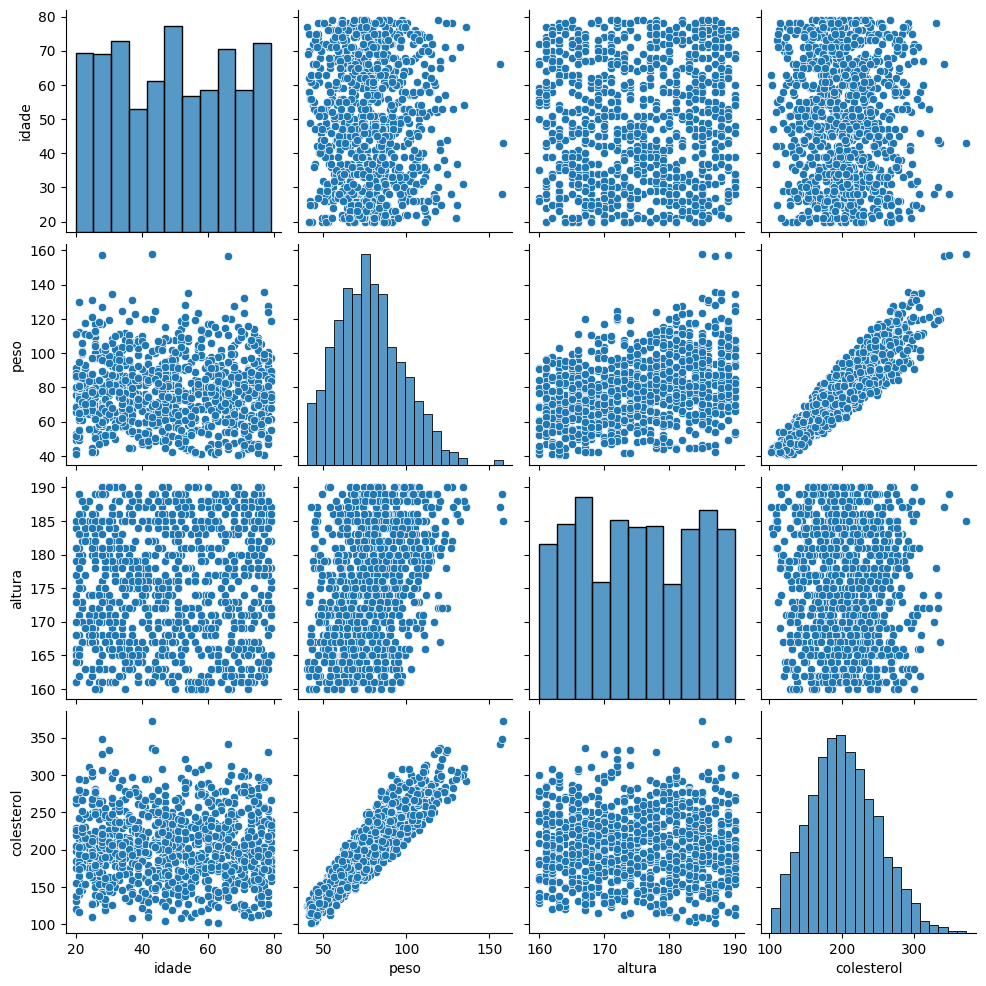

In [39]:
sns.pairplot(df_colesterol_eda)

In [40]:
# Get dummies - COnverter vairáveis categóricas nominais em numéricas, usando One Hot Encoding do Pandas
df_colesterol_da = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'], dtype='int64')

In [41]:
# Converter variável ordinal em numérica usando o factorizwe do pandas
df_colesterol_da['nivel_de_atividade_fisica'] = pd.factorize(df_colesterol_da['nivel_de_atividade_fisica'])[0] + 1

<Axes: >

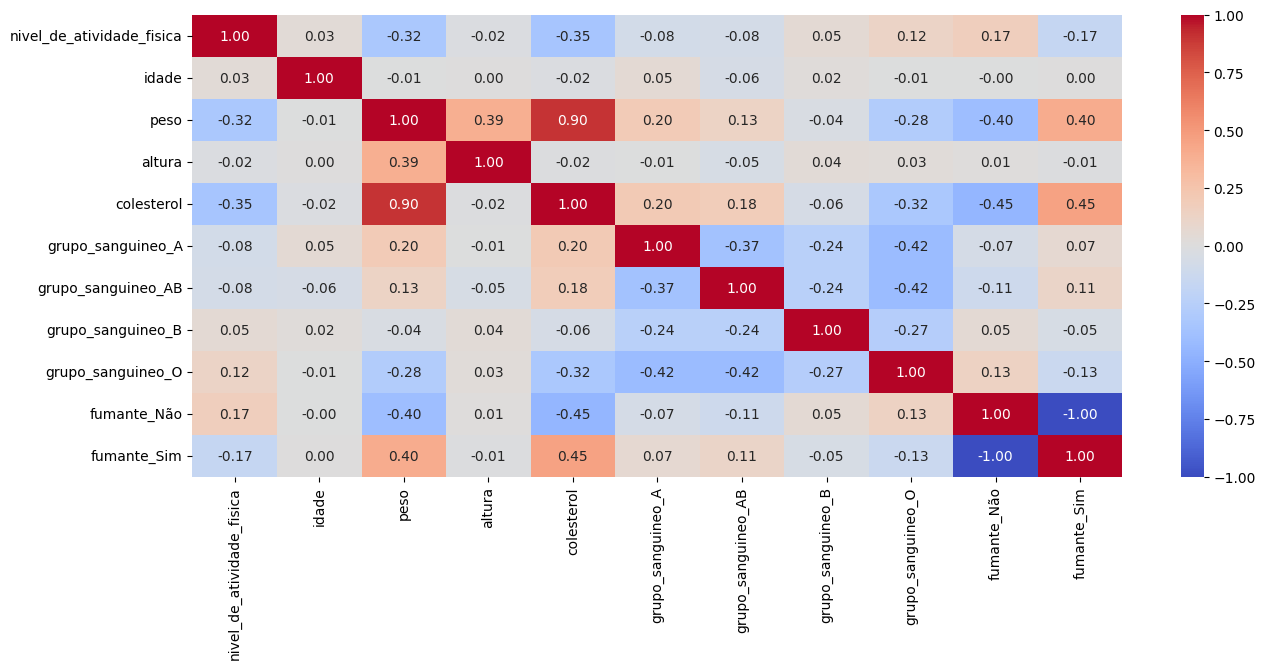

In [42]:
# Mapa de calor com correlação entre variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_da.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

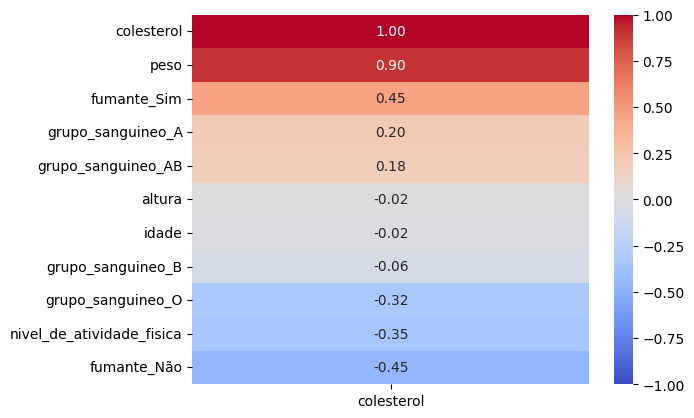

In [43]:
# Formato de Ranking, somente correlação com a variável target(colesterol)
sns.heatmap(df_colesterol_da.corr()[['colesterol']].sort_values(by='colesterol', ascending=False), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

In [44]:
# Bucketing Idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['escala_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins = bins_idade, labels = labels_idade, include_lowest = True)

<Axes: xlabel='escala_idade', ylabel='colesterol'>

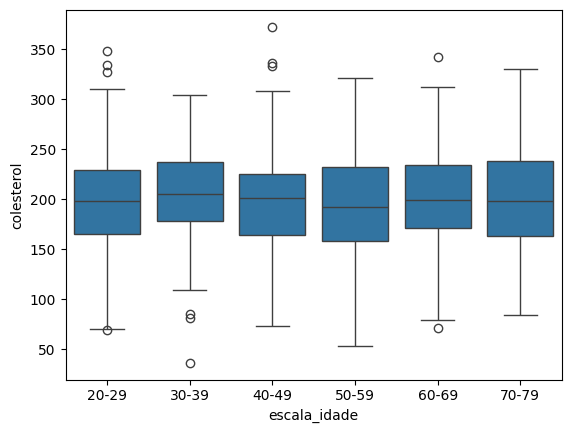

In [45]:
sns.boxplot(data=df_colesterol_bucketing, x='escala_idade', y='colesterol')

In [46]:
# Bucketing Peso
bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_colesterol_bucketing['escala_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], bins = bins_peso, labels = labels_peso, include_lowest = True)

<Axes: xlabel='escala_peso', ylabel='colesterol'>

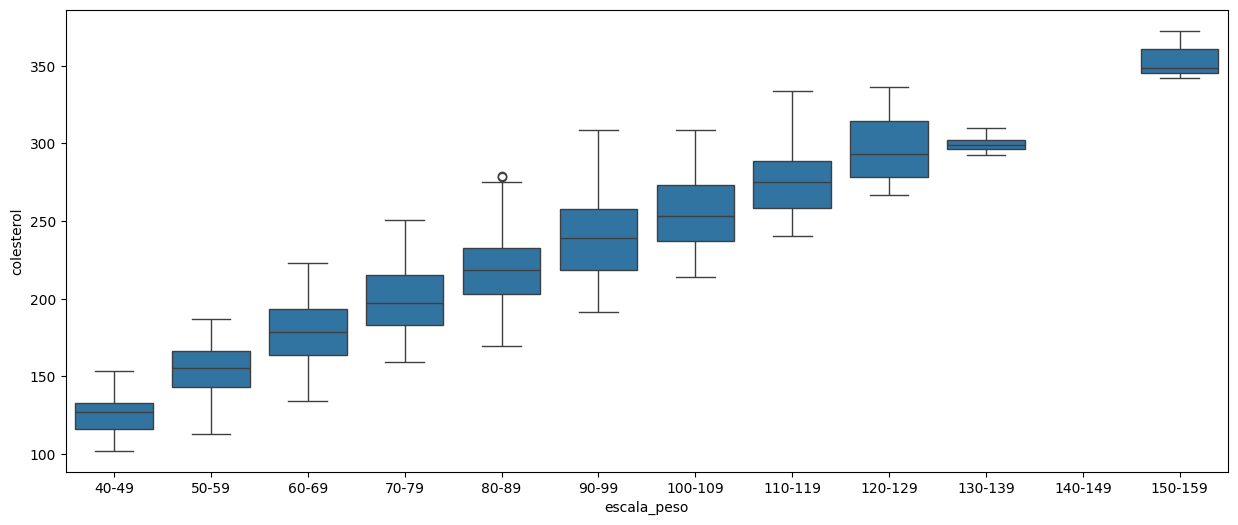

In [47]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_colesterol_bucketing, x='escala_peso', y='colesterol')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
# Criar Dataset de Treino e Teste
df_colesterol.drop(df_colesterol[df_colesterol.peso < 40].index, inplace=True)

In [50]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grupo_sanguineo            960 non-null    object 
 1   fumante                    960 non-null    object 
 2   nivel_de_atividade_fisica  959 non-null    object 
 3   idade                      960 non-null    float64
 4   peso                       960 non-null    float64
 5   altura                     960 non-null    float64
 6   colesterol                 963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [51]:
X = df_colesterol.drop(columns=['colesterol'], axis=1)
y = df_colesterol['colesterol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [52]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((289, 6), (674, 6), (289,), (674,))

In [53]:
# Pipeline de Pré-processamento
# Imputar moda nas variáveis categoricas - grupo_sanguineo, fumante, nivel_de_atividade_fisica
# Padronizar variáveis numéricas - idade, peso, altura
# OneHotEncode nas variáveis categóricas nominais - grupo_sanguineo, fumante
# OrdinalEncode nas variáveis categóricas ordinais - nivel_de_atividade_fisica
# Imputar mediana nas variáveis numéricas - idade, peso, altura

# Nomes das colunas
colunas_categoricas = ['grupo_sanguineo', 'fumante']
colunas_numericas = ['idade', 'peso', 'altura']
colunas_ordinais = ['nivel_de_atividade_fisica']

In [54]:
# Transformer Categoricas
transformer_categorias = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [55]:
# Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']])),
])

In [56]:
# Transformer Numéricas
transformer_numericas = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler()),
])

In [57]:
# Criar ColumnTransformer que encapsula as transformações
preprocessor = ColumnTransformer(
  transformers=[
    ('num', transformer_numericas, colunas_numericas),
    ('cat', transformer_categorias, colunas_categoricas),
    ('ord', transformer_ordinais, colunas_ordinais),
  ]
)

In [58]:
# Adicionar o modelo de Regressão Linear ao Pipeline
modelo = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('regressor', LinearRegression())
])

In [59]:
# Treinar o modelo
modelo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso', 'altura']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_de_atividade_fisica'])])),
                ('regressor', LinearRegression())])

In [62]:
# Prever valores
y_pred = modelo.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

r2, mae, mse, rmse

(0.9594250724093465, 7.313838031022501, 82.76722181210606, 9.097649246487032)

## Análise de Resíduos

In [63]:
# Calcular resíduos
residuos = y_test - y_pred

In [64]:
# Transfromar residuos na escala padrão
# (X - média) / desvio padrão
from scipy.stats import zscore
residuos_z = zscore(residuos)

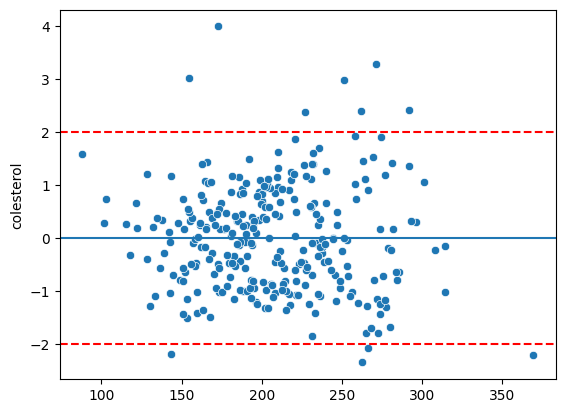

In [66]:
# Verificar linearidade dos resíduos: se valores estão entre -2 e 2
# Verificar homocedasticidade dos resíduos: se valores estão distribuídos aleatoriamente
sns.scatterplot(x=y_pred, y=residuos_z)
plt.axhline(y=0)
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')

Text(0, 0.5, 'Quantis dos Resíduos')

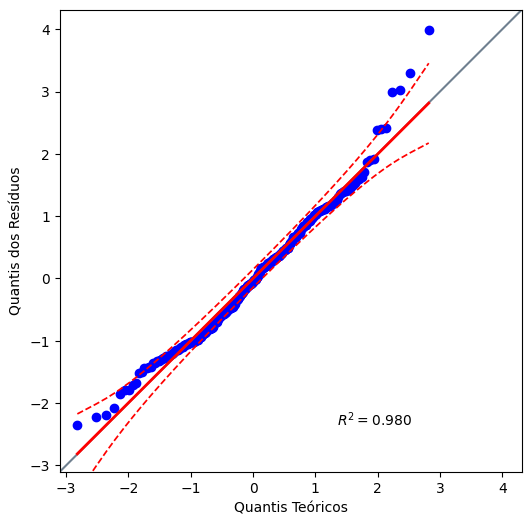

In [69]:
# Usar pengouin para teste de normalidade (QQ Plot)
import pingouin as pg
plt.figure(figsize=(15, 6))
pg.qqplot(residuos_z, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Resíduos')

In [74]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

# Teste de Shapiro-Wilk
shapiro_test = shapiro(residuos)
shapiro_test

ShapiroResult(statistic=0.980773772972073, pvalue=0.0006268860444489885)

In [75]:
# Teste de Kolmogorov-Smirnov
ks_test = kstest(residuos, 'norm')
ks_test

KstestResult(statistic=0.4245592099848544, pvalue=8.925833190918416e-48, statistic_location=-2.275868215539333, statistic_sign=1)

In [81]:
# Teste de Anderson-Darling
stat_and, critical_and, significance_and = anderson(residuos, dist='norm')
stat_and, critical_and, significance_and

(0.9169275158490677,
 array([0.568, 0.647, 0.776, 0.906, 1.077]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

In [80]:
# Teste de Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
stat_ll, p_value_ll

(0.049553710301928344, 0.12533323720737566)

In [87]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
])
X_test_transformed = pipe.fit_transform(X_test)

In [89]:
test_goldfeldquandt = het_goldfeldquandt(residuos, X_test_transformed)

In [90]:
test_goldfeldquandt

(0.6716135765253546, 0.9893959472385483, 'increasing')

### Realizar Predições inviduais

In [91]:
predicao_individual = {
  'grupo_sanguineo': 'O',
  'fumante': 'Não',
  'nivel_de_atividade_fisica': 'Alto',
  'idade': 40,
  'peso': 70,
  'altura': 180
}

df_predicao = pd.DataFrame([predicao_individual])

df_predicao

,grupo_sanguineo,fumante,nivel_de_atividade_fisica,idade,peso,altura
0,O,Não,Alto,40,70,180


In [92]:
modelo.predict(df_predicao)

array([165.32375099])

In [93]:
import joblib

# Salvar modelo
joblib.dump(modelo, 'modelo_colesterol.pkl')

['modelo_colesterol.pkl']

In [94]:
import gradio as gr
import joblib
import pandas as pd

e:\rocketseat_ia\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [95]:
modelo = joblib.load('modelo_colesterol.pkl')

In [98]:
def predict(grupo_sanguineo, fumante, nivel_de_atividade_fisica, idade, peso, altura):
  df_predicao = pd.DataFrame([{
    'grupo_sanguineo': grupo_sanguineo,
    'fumante': fumante,
    'nivel_de_atividade_fisica': nivel_de_atividade_fisica,
    'idade': idade,
    'peso': peso,
    'altura': altura
  }])

  return modelo.predict(df_predicao)[0]

In [100]:
iface = gr.Interface(
  fn=predict,
  inputs=[
    gr.Dropdown(['A', 'B', 'AB', 'O'], label='Grupo Sanguíneo'),
    gr.Dropdown(['Sim', 'Não'], label='Fumante'),
    gr.Dropdown(['Baixo', 'Moderado', 'Alto'], label='Nível de Atividade Física'),
    gr.Slider(20, 80, label='Idade', step=1),
    gr.Slider(40, 160, label='Peso', step=0.1),
    gr.Slider(150, 200, label='Altura', step=1),
  ],
  outputs='number',
)

In [104]:
iface.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
* Running on public URL: https://652d870c848d5a22b4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
